<h1 align="center">CSI1006 - MINIPROJECT

<h1 align="center">Title - ID Card Detection Using Computer Vision</h1>

<h1 align="center">Team Members

<h3 align="center">Priyanshi Premkumar - 19MIC0051</h3>
<h3 align="center">Ravuri Yashaswini Tejaswi - 19MIC0052</h3>
<h3 align="center">Aravinth R - 19MIC0053</h3>

# Import Dependencies

In [1]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

/Users/aravinth/miniconda3/envs/tensorflow/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/Users/aravinth/miniconda3/envs/tensorflow/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/Users/aravinth/miniconda3/envs/tensorflow/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/Users/aravinth/miniconda3/envs/tensorflow/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/Users/aravinth/miniconda3/envs/tensorflow/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ["dlopen(/Users/a

# Set GPU Growth

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Create Folder Structures

In [4]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [5]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

# Collect Positives and Anchors
# Untar Labelled Faces in the Wild Dataset

In [6]:
!tar -xf lfw.tgz

In [7]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

# Collect Positive and Anchor Classes

In [8]:
import uuid

In [9]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data/anchor/7d5c7fce-aca0-11ed-ab00-e62981bc5b11.jpg'

In [10]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    frame=frame[175:175+400,450:450+400,:]
    if cv2.waitKey(1) & 0XFF == ord('a'):
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
# Write out anchor image
        cv2.imwrite(imgname, frame)
    
    if cv2.waitKey(1) & 0XFF == ord('p'):
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
            # Write out positive image

        cv2.imwrite(imgname, frame)
# Show image back to screen
    cv2.imshow ('Image Collection', frame)
# Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

# Load and Preprocess Images
# Get Image Directories

In [11]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(300)

Metal device set to: Apple M1


2023-02-15 01:24:54.455363: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-15 01:24:54.455431: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
dir_test = anchor.as_numpy_iterator()

In [13]:
print(dir_test.next())

b'data/anchor/b7082b9c-aca0-11ed-ab00-e62981bc5b11.jpg'


# Preprocessing - Scale and Resize

In [14]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [15]:
img=preprocess('data/anchor/b7082b9c-aca0-11ed-ab00-e62981bc5b11.jpg')

In [16]:
img.numpy().max()

0.9960785

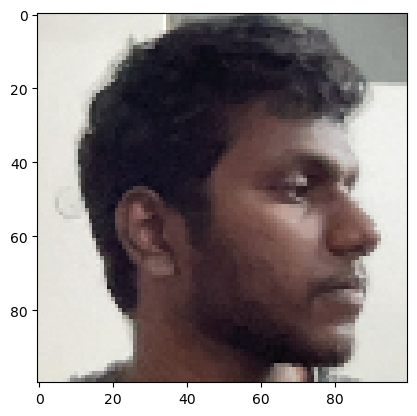

In [17]:
plt.imshow(img)

In [18]:
tf.ones(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

# Create Labelled Dataset

In [19]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [20]:
data

<ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [21]:
samples = data.as_numpy_iterator()

In [22]:
exampple=samples.next()

In [23]:
exampple

(b'data/anchor/d926d7a0-aca0-11ed-ab00-e62981bc5b11.jpg',
 b'data/positive/171a235a-aca1-11ed-ab00-e62981bc5b11.jpg',
 1.0)

# Build Train and Test Partition

In [24]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [25]:
res=preprocess_twin(*exampple)

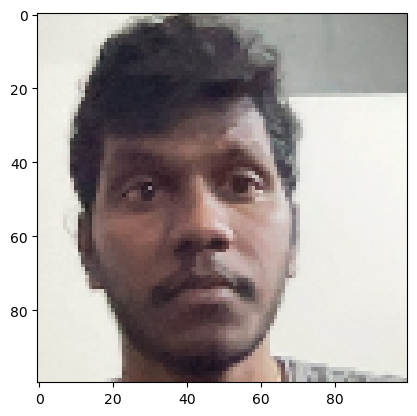

In [26]:
plt.imshow(res[1])

In [27]:
res[2]

1.0

In [28]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [29]:
round(len(data)*.7)

420

In [30]:
data

<ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [31]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [32]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [33]:
train_samples = train_data.as_numpy_iterator()

In [34]:
train_sample = train_samples.next()

2023-02-15 01:25:53.880411: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [35]:
len(train_sample[0])

16

In [36]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# Model Engineering
# Build Embedding Layer

In [37]:
inp = Input(shape=(100,100,3), name='input_image')

In [38]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [39]:
c1

<KerasTensor: shape=(None, 91, 91, 64) dtype=float32 (created by layer 'conv2d')>

In [40]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [41]:
m1

<KerasTensor: shape=(None, 46, 46, 64) dtype=float32 (created by layer 'max_pooling2d')>

In [42]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [43]:
m2

<KerasTensor: shape=(None, 20, 20, 128) dtype=float32 (created by layer 'max_pooling2d_1')>

In [44]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [45]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [46]:
f1

<KerasTensor: shape=(None, 9216) dtype=float32 (created by layer 'flatten')>

In [47]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [48]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [49]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [50]:
embedding = make_embedding()

In [51]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

# Build Distance Layer

In [52]:
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [53]:
l1 = L1Dist()

# Make Siamese Model

In [55]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [56]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [57]:
siamese_layer = L1Dist()

In [58]:
distances = siamese_layer(inp_embedding, val_embedding)

In [59]:
classifier = Dense(1, activation='sigmoid')(distances)

In [60]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [61]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [62]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [63]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [64]:
siamese_model = make_siamese_model()

In [65]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# Training
# Setup Loss and Optimizer

In [66]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [67]:
opt = tf.keras.optimizers.legacy.Adam(1e-4)

# Establish Checkpoints

In [68]:
checkpoint_dir = '.\training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

# Build Train Step Function

In [69]:
test_batch = train_data.as_numpy_iterator()

In [70]:
batch_1 = test_batch.next()

In [71]:
len(batch_1[0])

16

In [72]:
X = batch_1[:2]

In [73]:
np.array(X).shape

(2, 16, 100, 100, 3)

In [74]:
y = batch_1[2]

In [75]:
y

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
      dtype=float32)

In [76]:
tf.losses.BinaryCrossentropy??

In [77]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

# Build Training Loop

In [78]:
from tensorflow.keras.metrics import Precision, Recall

In [79]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

# Train the model

In [80]:
EPOCHS = 50

In [81]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)


2023-02-15 01:26:52.456893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/27 [>.............................] - ETA: 1:22

2023-02-15 01:26:55.214565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/27 [===========================>..] - ETA: 2sTensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)


2023-02-15 01:27:56.169032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 65s 2s/step
0.17790432 0.225 1.0

 Epoch 2/50
27/27 [==============================] - 64s 2s/step
0.13525705 0.8156682 0.9888269

 Epoch 3/50
27/27 [==============================] - 65s 2s/step
0.07876028 0.96713614 0.985646

 Epoch 4/50
27/27 [==============================] - 65s 2s/step
0.0005707845 0.9198113 0.9898477

 Epoch 5/50
27/27 [==============================] - 64s 2s/step
0.00025487095 0.96618354 0.99502486

 Epoch 6/50
27/27 [==============================] - 64s 2s/step
0.022224113 0.9952607 1.0

 Epoch 7/50
1/1 [==============================] - 2s 2s/step


27/27 [==============================] - 64s 2s/step
0.012665545 0.99061036 1.0

 Epoch 8/50
27/27 [==============================] - 66s 2s/step
0.000611211 1.0000001 1.0000001

 Epoch 9/50
27/27 [==============================] - 67s 2s/step
0.00034677572 1.0 1.0

 Epoch 10/50
27/27 [==============================] - 67s 2s/step
0.004528122 1.0 1.0

 Epoch 11/50
27/27 [==============================] - 67s 2s/step
0.000107418455 1.0 1.0

 Epoch 12/50
27/27 [==============================] - 68s 3s/step
0.025597405 1.0 1.0

 Epoch 13/50
1/1 [==============================] - 2s 2s/step


27/27 [==============================] - 68s 2s/step
0.0056418236 1.0 1.0

 Epoch 14/50
27/27 [==============================] - 68s 3s/step
0.0017385058 1.0 1.0

 Epoch 15/50
27/27 [==============================] - 69s 3s/step
0.3726796 0.9425838 0.9704433

 Epoch 16/50
27/27 [==============================] - 68s 3s/step
0.00094441476 0.97596157 1.0

 Epoch 17/50
27/27 [==============================] - 69s 3s/step
0.005533063 1.0 1.0

 Epoch 18/50
1/1 [==============================] - 2s 2s/step


27/27 [==============================] - 68s 3s/step
0.00069867447 1.0 1.0

 Epoch 19/50
27/27 [==============================] - 68s 3s/step
1.7496815e-05 1.0000001 1.0000001

 Epoch 20/50
27/27 [==============================] - 68s 3s/step
0.005667129 1.0 1.0

 Epoch 21/50
27/27 [==============================] - 69s 3s/step
0.0018619131 1.0 1.0

 Epoch 22/50
27/27 [==============================] - 68s 3s/step
4.3855653e-05 1.0 1.0

 Epoch 23/50
27/27 [==============================] - 69s 3s/step
3.3051833e-07 1.0 1.0

 Epoch 24/50
1/1 [==============================] - 2s 2s/step


27/27 [==============================] - 69s 3s/step
5.598154e-06 1.0 1.0

 Epoch 25/50
27/27 [==============================] - 69s 3s/step
1.4460177e-06 1.0 1.0

 Epoch 26/50
27/27 [==============================] - 69s 3s/step
1.3427307e-06 1.0 1.0

 Epoch 27/50
27/27 [==============================] - 69s 3s/step
7.748589e-05 1.0 1.0

 Epoch 28/50
27/27 [==============================] - 70s 3s/step
1.8591656e-07 1.0 1.0

 Epoch 29/50
27/27 [==============================] - 71s 3s/step
0.0009370608 1.0 1.0

 Epoch 30/50
1/1 [==============================] - 3s 3s/step


27/27 [==============================] - 71s 3s/step
0.00030870413 1.0 1.0

 Epoch 31/50
27/27 [==============================] - 71s 3s/step
7.168116e-06 1.0000001 1.0000001

 Epoch 32/50
27/27 [==============================] - 71s 3s/step
0.0014021413 1.0000001 1.0000001

 Epoch 33/50
27/27 [==============================] - 72s 3s/step
0.0013122198 1.0 1.0

 Epoch 34/50
27/27 [==============================] - 71s 3s/step
2.5780431e-05 1.0 1.0

 Epoch 35/50
1/1 [==============================] - 3s 3s/step


27/27 [==============================] - 77s 3s/step
6.7136534e-06 1.0 1.0

 Epoch 36/50
27/27 [==============================] - 78s 3s/step
2.0244247e-06 1.0 1.0

 Epoch 37/50
27/27 [==============================] - 78s 3s/step
0.00018961423 1.0 1.0

 Epoch 38/50
27/27 [==============================] - 78s 3s/step
9.295828e-07 1.0 1.0

 Epoch 39/50
27/27 [==============================] - 78s 3s/step
0.0 1.0 1.0

 Epoch 40/50
27/27 [==============================] - 78s 3s/step
0.0005435374 1.0 1.0

 Epoch 41/50
1/1 [==============================] - 3s 3s/step


27/27 [==============================] - 77s 3s/step
9.213199e-06 1.0 1.0

 Epoch 42/50
27/27 [==============================] - 71s 3s/step
6.6103667e-07 0.99999994 0.99999994

 Epoch 43/50
27/27 [==============================] - 71s 3s/step
7.967558e-05 1.0 1.0

 Epoch 44/50
27/27 [==============================] - 71s 3s/step
0.0004670637 1.0 1.0

 Epoch 45/50
27/27 [==============================] - 71s 3s/step
2.6234893e-05 1.0 1.0

 Epoch 46/50
27/27 [==============================] - 71s 3s/step
0.0001562319 1.0 1.0

 Epoch 47/50
1/1 [==============================] - 3s 3s/step


27/27 [==============================] - 71s 3s/step
0.0 1.0 1.0

 Epoch 48/50
27/27 [==============================] - 71s 3s/step
5.577497e-07 1.0 1.0

 Epoch 49/50
27/27 [==============================] - 71s 3s/step
0.00023943988 1.0 1.0

 Epoch 50/50
27/27 [==============================] - 71s 3s/step
0.0 1.0 1.0


# Evaluate Model
# Import Metrics

In [82]:
from tensorflow.keras.metrics import Precision, Recall

# Make Predictions

In [83]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [84]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 [==============================] - 0s 64ms/step


In [85]:
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [86]:
y_true

array([1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
      dtype=float32)

# Calculate Metrics

In [87]:
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [88]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 0s 18ms/step
1.0 1.0


# Viz Results

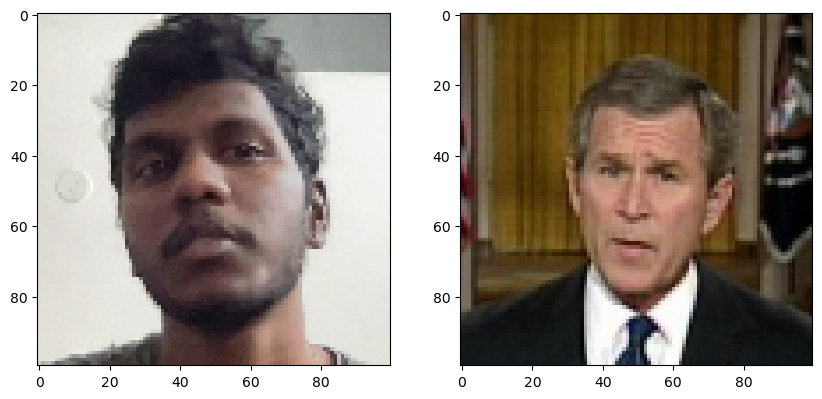

In [94]:
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[2])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[2])

# Renders cleanly
plt.show()

# Save Model

In [95]:
siamese_model.save('siamesemodelv2.h5')

In [96]:
L1Dist

__main__.L1Dist

In [97]:
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [98]:
siamese_model.predict([test_input, test_val])

1/1 [==============================] - 0s 160ms/step


2023-02-15 07:38:38.877933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[3.6542380e-11],
       [1.0930846e-07],
       [3.0449719e-11],
       [9.9999964e-01]], dtype=float32)

In [99]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# Real Time Test
# Verification Function

In [100]:
os.listdir(os.path.join('application_data', 'verification_images'))

['62a0fc18-aca1-11ed-ab00-e62981bc5b11.jpg',
 '589edd5c-aca1-11ed-ab00-e62981bc5b11.jpg',
 'e6905966-aca0-11ed-ab00-e62981bc5b11.jpg',
 '592dd246-aca1-11ed-ab00-e62981bc5b11.jpg',
 'e65d83f6-aca0-11ed-ab00-e62981bc5b11.jpg',
 '61ef707e-aca1-11ed-ab00-e62981bc5b11.jpg',
 'e79dc618-aca0-11ed-ab00-e62981bc5b11.jpg',
 '41ffe7ee-aca1-11ed-ab00-e62981bc5b11.jpg',
 'e76aed24-aca0-11ed-ab00-e62981bc5b11.jpg',
 'f3fd44ce-aca0-11ed-ab00-e62981bc5b11.jpg',
 'e7d09c78-aca0-11ed-ab00-e62981bc5b11.jpg',
 '59f8a3f4-aca1-11ed-ab00-e62981bc5b11.jpg',
 '59473f06-aca1-11ed-ab00-e62981bc5b11.jpg',
 '622244f4-aca1-11ed-ab00-e62981bc5b11.jpg',
 '5a911dd2-aca1-11ed-ab00-e62981bc5b11.jpg',
 'e9674f64-aca0-11ed-ab00-e62981bc5b11.jpg',
 '626e7f9a-aca1-11ed-ab00-e62981bc5b11.jpg',
 'e93484c6-aca0-11ed-ab00-e62981bc5b11.jpg',
 '5a5e378c-aca1-11ed-ab00-e62981bc5b11.jpg',
 '60e1dd0c-aca1-11ed-ab00-e62981bc5b11.jpg',
 'e8037ff8-aca0-11ed-ab00-e62981bc5b11.jpg',
 '59145e42-aca1-11ed-ab00-e62981bc5b11.jpg',
 '60af2d62

In [101]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data/input_image/input_image.jpg'

In [102]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data/verification_images/62a0fc18-aca1-11ed-ab00-e62981bc5b11.jpg
application_data/verification_images/589edd5c-aca1-11ed-ab00-e62981bc5b11.jpg
application_data/verification_images/e6905966-aca0-11ed-ab00-e62981bc5b11.jpg
application_data/verification_images/592dd246-aca1-11ed-ab00-e62981bc5b11.jpg
application_data/verification_images/e65d83f6-aca0-11ed-ab00-e62981bc5b11.jpg
application_data/verification_images/61ef707e-aca1-11ed-ab00-e62981bc5b11.jpg
application_data/verification_images/e79dc618-aca0-11ed-ab00-e62981bc5b11.jpg
application_data/verification_images/41ffe7ee-aca1-11ed-ab00-e62981bc5b11.jpg
application_data/verification_images/e76aed24-aca0-11ed-ab00-e62981bc5b11.jpg
application_data/verification_images/f3fd44ce-aca0-11ed-ab00-e62981bc5b11.jpg
application_data/verification_images/e7d09c78-aca0-11ed-ab00-e62981bc5b11.jpg
application_data/verification_images/59f8a3f4-aca1-11ed-ab00-e62981bc5b11.jpg
application_data/verification_images/59473f06-aca1-11ed-ab00-e62

In [103]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

# OpenCV Real Time Verification

# Input Image

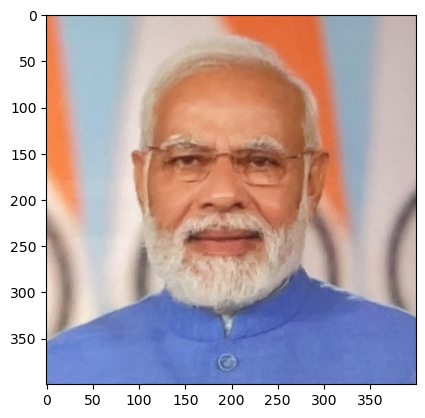

In [122]:
input_img=cv2.imread("/Users/aravinth/Desktop/Miniproject/application_data/input_image/input_image.jpg")
img_rgb = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [115]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    frame=frame[175:175+400,450:450+400,:]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.9, 0.7)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 11ms/step
False


## Final Results

In [114]:
np.sum(np.squeeze(results) > 0.9)

44

In [116]:
results

[array([[7.7862705e-06]], dtype=float32),
 array([[5.0830968e-06]], dtype=float32),
 array([[0.00014712]], dtype=float32),
 array([[1.6571266e-05]], dtype=float32),
 array([[0.0010051]], dtype=float32),
 array([[2.9162092e-07]], dtype=float32),
 array([[7.009997e-06]], dtype=float32),
 array([[1.7758278e-08]], dtype=float32),
 array([[5.546062e-05]], dtype=float32),
 array([[4.41988e-05]], dtype=float32),
 array([[2.1552255e-06]], dtype=float32),
 array([[1.598842e-08]], dtype=float32),
 array([[7.723683e-05]], dtype=float32),
 array([[7.132384e-07]], dtype=float32),
 array([[0.00024678]], dtype=float32),
 array([[0.00130068]], dtype=float32),
 array([[0.00011895]], dtype=float32),
 array([[0.00017803]], dtype=float32),
 array([[3.6019275e-05]], dtype=float32),
 array([[9.590894e-06]], dtype=float32),
 array([[8.635575e-05]], dtype=float32),
 array([[0.00048094]], dtype=float32),
 array([[4.3865486e-05]], dtype=float32),
 array([[7.9455754e-07]], dtype=float32),
 array([[1.0430603e-06]

# Thank You